# Reconocimiento de dígitos con KNN, con y sin weights


Definir los path al ejecutable de python 3.6 y sus librerías,
de acuerdo al virtual env que estén corriendo.

In [ ]:
!cd .. && ./build.sh

## Explorando los datos

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd

df_train = pd.read_csv("../data/train.csv")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


### Reducir el dataset

Ya que el dataset es grande, me quedo con una porción de éste

**<font color=red>ESTO ES SOLO PARA HACER PRUEBAS. CUANDO REPORTEN LOS RESULTADOS, USAR DATASET COMPLETO</font>**

In [2]:
df_train.sample(frac=1)
df_train = df_train[:5000]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 29.9 MB


In [3]:
# Uso values para mandar todo a arrays de numpy
X = df_train[df_train.columns[1:]].values
y = df_train["label"].values.reshape(-1, 1)

X.shape, y.shape

((5000, 784), (5000, 1))

### Conjunto de development

In [9]:
import metnum
import pandas as pd
from scoring import metrics
from scoring import cross_validation as cv
from tqdm import tqdm

df = pd.DataFrame(columns=["k", "weight_type", "accuracy", "recall", "precision", "f1"])

scoring_fns = {
    "accuracy":  metrics.accuracy_score,
    "recall":    metrics.recall_score,
    "precision": metrics.precision_score,
    "f1":        metrics.f1_score,
}

ks = [1, 2, 5, 10, 20, 40, 60, 80, 100, 200, 1000]

for k in tqdm(ks):
    clf = metnum.KNNClassifier(k)
    for weight_type in ["uniform", "distance", "distance_pow"]:
        scores = cv.cross_validate_fns(clf, X, y, scoring_fns, 4, weights=weight_type)

        # scores es un dict con las keys de scoring_fns, que son las
        # mismas que las columnas del dataframe.
        df = df.append({
            **{
                "k": k,
                "weight_type": weight_type,
            }, 
            **scores
        }, ignore_index=True)


100%|██████████| 11/11 [09:51<00:00, 53.76s/it]


In [10]:
df

,k,weight_type,accuracy,recall,precision,f1
0,1,uniform,0.9278,0.926971,0.927363,0.926272
1,1,distance,0.9278,0.926971,0.927363,0.926272
2,1,distance_pow,0.9278,0.926971,0.927363,0.926272
3,2,uniform,0.9126,0.911246,0.915466,0.910316
4,2,distance,0.9278,0.926971,0.927363,0.926272
5,2,distance_pow,0.9278,0.926971,0.927363,0.926272
6,5,uniform,0.9252,0.923886,0.926547,0.923974
7,5,distance,0.9290,0.927879,0.930253,0.927888
8,5,distance_pow,0.9312,0.929899,0.932407,0.929993
9,10,uniform,0.9180,0.917248,0.920938,0.917275


/home/mnpanic/.virtualenvs/metodos/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.75, 1.0)

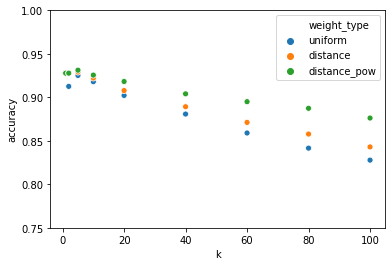

In [19]:
import seaborn as sns

plot = sns.scatterplot(data=df[df.k != 1000][df.k !=  200], x="k", y="accuracy", hue="weight_type")
plot.set_ylim(0.75, 1)